# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [4]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: PCA measures the direction of maximum variance, so the components with the highest variance will likely show up as the first PCA dimensions.  Those components are: Fresh, Milk, and Groccery.

(Although we can probably infer by the considerably higher magnitude of the components in those 3 columns that their variance will be higher than the rest, I've verified this assertion by manually calculating the variance myself.)

ICA, on the other hand, is used to separate a signal into its independent and distinct sources.  In this case, our "signal" is the data consisting of how much of each good a customer or business bought from the supplier and the "source" is a customer segment or business sector that tends to purchase each product in very distinct patterns (i.e. lots of Fresh, little Frozen, little Grocery.)


###PCA

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


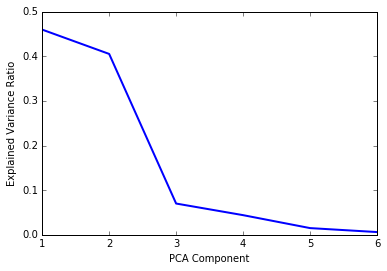

In [94]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)
plt.figure(2)
plt.plot([1, 2, 3, 4, 5, 6],pca.explained_variance_ratio_,lw=2)
plt.xlabel("PCA Component")
plt.ylabel("Explained Variance Ratio")
# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The first 2 dimensions account for nearly 86% of all of the variance (46% and 40% respectively) and suddenly drops of to 7% and 4% for the 3rd and 4th components.  It makes sense to use only the first 2 dimensions and only maybe try again with the 3rd dimension added back if the analysis using only the first 2 dimensions ends up unsatisfactory.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The first dimension has a highly negative correlation (-0.98) with the first variable: Fresh.  This dimension represents a measure of how little one is spending on Fresh produce.  The second dimension has moderately high correlations with the 2nd and 3rd variables: Milk and Grocery.  This dimension represents a measure of how much one is spending on Milk and Grocery.

Looking at the first two dimensions and how they are sensitive to Fresh, Milk, and Grocery, we can use this info to simplify our data analysis and attack this problem by only looking at those 3 variables.

###ICA

In [49]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA()
from sklearn.preprocessing import StandardScaler
myscaler = StandardScaler()
data2 = myscaler.fit_transform(data)
ica.fit(data2)
components2 = 1000*ica.components_
print components2.astype(int)
# Print the independent components
print ica.components_

[[   4    2    5    2   -2  -51]
 [  50   -6   -6   -3   10   -2]
 [  -3   17  111   -7 -133  -16]
 [   2  -13   66    1  -10   -4]
 [   2   72  -55   -1   16  -16]
 [ -10    0    7   54   -2  -16]]
[[ 0.00491649  0.00206317  0.00535898  0.00256706 -0.00234091 -0.05108596]
 [ 0.0502478  -0.00659407 -0.00684818 -0.00323967  0.01088889 -0.00273003]
 [-0.00350937  0.01789122  0.11104938 -0.0071914  -0.13383397 -0.01600722]
 [ 0.00256338 -0.01334283  0.06681979  0.00160023 -0.01055638 -0.00483474]
 [ 0.00204522  0.07243867 -0.05534274 -0.0018164   0.01627573 -0.01669853]
 [-0.01091798 -0.00097245  0.00727544  0.05404895 -0.00256519 -0.01673607]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: We'll refer to the following transformed ICA matrix for our analysis:
[[   4    2    5    2   -2  -51]
 [  50   -6   -6   -3   10   -2]
 [  -3   17  111   -7 -133  -16]
 [   2  -13   66    1  -10   -4]
 [   2   72  -55   -1   16  -16]
 [ -10    0    7   54   -2  -16]]
 
 The first vector, [   4    2    5    2   -2  -51], refers to a business that spends roughly average on everything except Delicatssen items.  If we multiply it by -1, we get [   -4    -2    -5    -2   2  51] which indicates roughly average spending on most items but above average spending on Delicatssen.  This probably corresponds to a Deli or Sandwich shop.
 
 The second vector, [  50   -6   -6   -3   10   -2], refers to a business that spends a disproportionate amount in Fresh produce and a little more than average on Detergents and Paper.  The only type of business that somewhat fits this is a farmer's market store.
 
 The third vector, [  -3   17  111   -7 -133  -16], refers to a business that spends a lot more than average on groceries and a lot less than average on Detergents and Paper products.  If we multiply it by -1, we get [  3   -17  -111   7  133  16], a business that spends a lot on detergents and little on groceries.  A hotel might fit this.
 
 The fourth vector, [   2  -13   66    1  -10   -4], corresponds to a business that spends a lot more on Groceries than everything else.  This is likely a grocery store.
 
 The fifth vector, [   2   72  -55   -1   16  -16], corresponds to a business that buys a disproportionate amount of Milk products and very little Grocery products.  This looks like a cheese maker.
 
 The sixth vector, [ -10    0    7   54   -2  -16], corresponds to a business that buys a ton of frozen foods.  This is likely a convenience store.
 
 These vectors could be used to explore possible customer segmentations and the real-world business that the particular segmentation might correspond to (like I've suggested above.)

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: K-Means clustering scales well to very large sample sizes.  Gaussian Mixture Models work well for density estimation.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [50]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [76]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca2 = PCA(n_components = 2)
reduced_data = pca2.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [86]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans(n_clusters = 2).fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [87]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [88]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
print centroids

[[-24088.33276689   1218.17938291]
 [  4175.31101293   -211.15109304]]


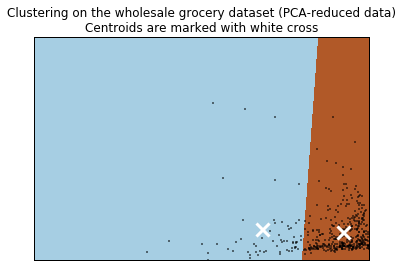

In [89]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

**9)** How would you use that technique to help the company design new experiments?

Answer: 

**10)** How would you use that data to help you predict future customer needs?

Answer: 